<a href="https://colab.research.google.com/github/elmilanos/ProbabilityStatistics/blob/main/Pr%C3%A1ctica_10_Pruebas_de_Hip%C3%B3tesis_II_(Medias_y_Proporciones).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

# Cargar el archivo Excel
excel_path = "/Practica_Hipotesis (2a parte).xlsx"
excel_file = pd.ExcelFile(excel_path)

# Mostrar nombres de las hojas
excel_file.sheet_names


['Calidad_Productos', 'Ventas', 'Tiempos_Entrega', 'Satisfaccion_Clientes']

In [3]:
# Cargar la hoja Calidad_Productos
df_calidad = excel_file.parse('Calidad_Productos')
df_calidad.head()


,Lote_A,Lote_B
0,79.967142,61.015551
1,73.617357,72.952256
2,81.476885,73.887426
3,90.230299,68.372673
4,72.658466,76.064571


# Parte 1: Prueba T para Medias - Calidad de Productos
## Hipótesis:
- **H₀:** Las medias de calidad de los lotes A y B son iguales.

- **H₁:** Las medias son diferentes.

In [5]:
from scipy.stats import ttest_ind

# Extraer las calificaciones de calidad
lote_a = df_calidad['Lote_A']
lote_b = df_calidad['Lote_B']

# Prueba T para muestras independientes (varianzas no asumidas iguales)
t_stat, p_value = ttest_ind(lote_a, lote_b, equal_var=False)

# Calcular medias
media_a = lote_a.mean()
media_b = lote_b.mean()

# media_a, media_b, t_stat, p_value
print(f"Media Lote A: {media_a:.2f}")
print(f"Media Lote B: {media_b:.2f}")
print(f"Estadística t: {t_stat:.2f}")
print(f"Valor p: {p_value:.4f}")

Media Lote A: 73.96
Media Lote B: 78.27
Estadística t: -2.95
Valor p: 0.0036


## Conclusión:
Dado que el valor p es **menor que 0.05, rechazamos la hipótesis nula (H₀).
Existe una diferencia significativa en la calidad promedio entre los Lotes A y B.**

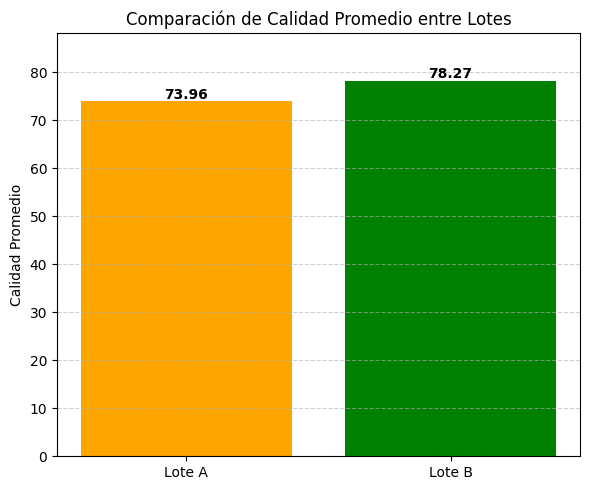

In [6]:
import matplotlib.pyplot as plt

# Gráfico de barras de medias
plt.figure(figsize=(6, 5))
plt.bar(['Lote A', 'Lote B'], [media_a, media_b], color=['orange', 'green'])
plt.title('Comparación de Calidad Promedio entre Lotes')
plt.ylabel('Calidad Promedio')
plt.ylim(0, max(media_a, media_b) + 10)

# Etiquetas con los valores
for i, v in enumerate([media_a, media_b]):
    plt.text(i, v + 0.5, f'{v:.2f}', ha='center', fontweight='bold')

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

 Gráfica comparativa: se observa claramente que **Lote B tiene una mayor calificación promedio de calidad** que Lote A.

 ---

#Parte 2: Prueba T para Medias - Ventas de Productos A y B

##Hipótesis:
- **H₀:** Las medias de ventas de los productos A y B son iguales.
- **H₁:** Las medias de ventas de los productos A y B son diferentes.

In [7]:
# Cargar datos de la hoja Ventas
df_ventas = excel_file.parse('Ventas')
df_ventas.head()

,Mes,Producto_A,Producto_B
0,Enero,885,837
1,Febrero,973,707
2,Marzo,772,824
3,Abril,603,805
4,Mayo,916,335


Los datos contienen las **ventas mensuales** durante un año para los **Productos A y B**.

In [8]:
# Extraer las ventas de cada producto
ventas_a = df_ventas['Producto_A']
ventas_b = df_ventas['Producto_B']

# Prueba T para muestras independientes
t_stat, p_value = ttest_ind(ventas_a, ventas_b, equal_var=False)

# Calcular medias
media_a = ventas_a.mean()
media_b = ventas_b.mean()

print(f"Media Producto A: {media_a:.2f}")
print(f"Media Producto B: {media_b:.2f}")
print(f"Estadística t: {t_stat:.2f}")
print(f"Valor p: {p_value:.4f}")

Media Producto A: 786.83
Media Producto B: 630.00
Estadística t: 2.18
Valor p: 0.0413


## Conclusión:
Dado que el valor p es **menor que 0.05, rechazamos la hipótesis nula (H₀).
Existe una diferencia significativa en las ventas promedio entre los productos A y B.**

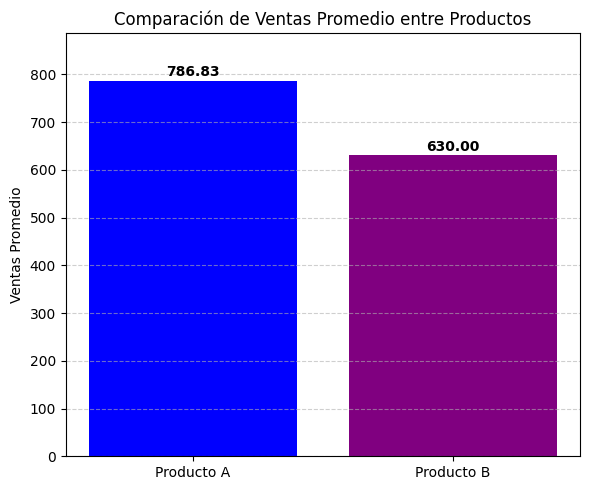

In [9]:
# Gráfico de barras de medias de ventas
plt.figure(figsize=(6, 5))
plt.bar(['Producto A', 'Producto B'], [media_a, media_b], color=['blue', 'purple'])
plt.title('Comparación de Ventas Promedio entre Productos')
plt.ylabel('Ventas Promedio')
plt.ylim(0, max(media_a, media_b) + 100)

# Etiquetas con valores
for i, v in enumerate([media_a, media_b]):
    plt.text(i, v + 10, f'{v:.2f}', ha='center', fontweight='bold')

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Gráfica de Barras: el **Producto A tiene una media de ventas superior** al Producto B, y la diferencia es estadísticamente significativa.

---

# Prueba T de Dos Muestras: Tiempos de Entrega (Lote A vs Lote B)

En este análisis compararemos los tiempos de entrega de dos lotes (A y B) para determinar si existe una diferencia significativa entre sus medias. Se formularon las siguientes hipótesis:
- **H₀ (Hipótesis nula):** Los tiempos de entrega de los lotes A y B tienen la misma media (no hay diferencia significativa).
- **H₁ (Hipótesis alternativa):** Los tiempos de entrega de los lotes A y B tienen medias diferentes.
Usaremos una prueba *t* para muestras independientes con un nivel de significancia α = 0.05. A continuación, se detallan los pasos del análisis:

## 1. Carga de Datos y Estadísticas Descriptivas
Primero, cargamos los datos de la hoja **"Tiempos_Entrega"** del archivo Excel y calculamos la media y la desviación estándar de los tiempos de entrega para cada lote. Esto nos dará una idea general de los datos antes de realizar la prueba de hipótesis.


In [11]:
# Cargar las librerías necesarias
import pandas as pd

# Leer los datos de la hoja 'Tiempos_Entrega' del archivo Excel
datos = pd.read_excel('/Practica_Hipotesis (2a parte).xlsx', sheet_name='Tiempos_Entrega')

# Calcular media y desviación estándar para cada lote
media_A = datos['Lote_A'].mean()
std_A   = datos['Lote_A'].std()
media_B = datos['Lote_B'].mean()
std_B   = datos['Lote_B'].std()

print(f"Media Lote A: {media_A:.3f}")
print(f"Desv. Estándar Lote A: {std_A:.3f}")
print(f"Media Lote B: {media_B:.3f}")
print(f"Desv. Estándar Lote B: {std_B:.3f}")

Media Lote A: 5.153
Desv. Estándar Lote A: 1.126
Media Lote B: 4.298
Desv. Estándar Lote B: 1.414


Como se observa, el **Lote A** tiene un tiempo de entrega promedio ligeramente mayor que el Lote B. También la dispersión (desviación estándar) en los tiempos del Lote B es algo mayor que la del Lote A. Estos valores sirven como contexto antes de contrastar formalmente las medias mediante la prueba *t*.

## 2. Prueba *t* de Muestras Independientes (Igualdad de Medias)
A continuación, aplicamos la prueba t para dos muestras independientes con los datos de los lotes A y B. Esta prueba evalúa si la diferencia entre las medias muestrales es estadísticamente significativa. Usaremos la función ttest_ind de SciPy para obtener el estadístico *t* y el valor *p*. Suponemos que las varianzas de las dos muestras pueden ser tratadas como iguales (supuesto tradicional de la t de Student para muestras independientes).

In [13]:
from scipy import stats

# Realizar la prueba t de muestras independientes
t_stat, p_val = stats.ttest_ind(datos['Lote_A'], datos['Lote_B'], equal_var=True)

print(f"Estadístico t: {t_stat:.4f}")
print(f"Valor p: {p_val:.4f}")

Estadístico t: 3.3445
Valor p: 0.0012


## 3. Valor *p* y Decision Estadistica
El valor *p* obtenido (~0.0012) es la probabilidad de observar una diferencia de medias tan grande como la presente (o mayor) asumiendo que en realidad **no hay diferencia** entre las medias de los lotes (H₀ verdadera).
Con un nivel de significancia α = 0.05, comparamos el valor *p* con α:
- α = 0.05
- p ≈ 0.0012

Dado que *p* **< 0.05**, el valor *p* es **mucho menor** que el nivel de significancia. Esto indica que la diferencia observada en las medias **no es debida al azar**. En consecuencia, se **rechaza la hipótesis nula (H₀)**. Existe evidencia estadística suficiente para afirmar que la media de los tiempos de entrega del Lote A es **diferente** a la del Lote B.

En otras palabras, los tiempos de entrega promedio de los lotes A y B **no son iguales** con un 95% de confianza. El lote A tiene un tiempo medio de entrega mayor que el lote B, y esta diferencia es estadísticamente significativa bajo las condiciones de la prueba realizada.

# 4. Visualización: Gráfica Boxplot de Tiempos de Entrega por Lote
Para comprender mejor la distribución de los datos de cada lote, se genera un diagrama de caja *(boxplot)*. Esta visualización resume los cuantiles (mediana, cuartiles) y posibles valores atípicos de los tiempos de entrega para los lotes A y B.

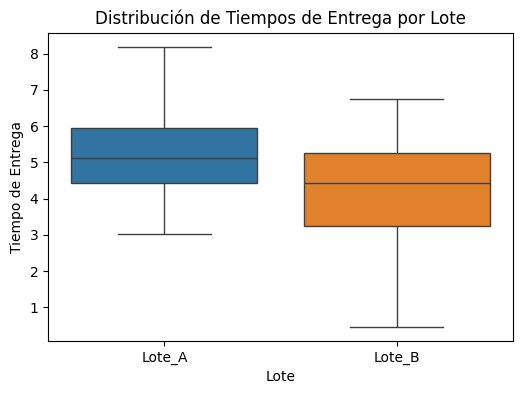

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Graficar un boxplot comparando los tiempos de entrega de Lote A y Lote B
plt.figure(figsize=(6,4))
sns.boxplot(data=datos[['Lote_A', 'Lote_B']])
plt.ylabel('Tiempo de Entrega')
plt.xlabel('Lote')
plt.title('Distribución de Tiempos de Entrega por Lote')
plt.show()

La gráfica de caja confirma las estadísticas calculadas: la mediana del **Lote A** está por encima de la mediana del **Lote B**, lo que sugiere nuevamente que el Lote A tiene mayores tiempos de entrega en general. También se aprecia que la caja del Lote B es más larga, indicando mayor variabilidad en sus tiempos. No se observan valores atípicos extremos en ninguno de los lotes, y ambos se distribuyen dentro de rangos razonables.

# 5. Conclusión de la Prueba de Hipótesis
En conclusión, con base en la prueba t de muestras independientes realizada, **se rechaza la hipótesis nula H₀** a un nivel de significancia de 0.05. Esto significa que **existe una diferencia significativa** entre los tiempos de entrega promedio de los lotes A y B. Específicamente, el Lote A muestra un tiempo de entrega promedio mayor que el Lote B.

En términos prácticos, los resultados sugieren que los dos lotes no tienen el mismo desempeño en tiempos de entrega. Si este análisis corresponde a un contexto de calidad o logística, habría que investigar las causas por las cuales el Lote A tarda más en entregarse que el Lote B, ya que la diferencia observada es estadísticamente significativa y poco probable que se deba al azar.